In [1]:
from river.datasets import synth
from clustream import CluStream
from river import drift
import math
import numpy as np
import matplotlib.pyplot as plt
from river.utils import dict2numpy
from scipy.spatial import distance_matrix
from time import time
from river import stream
import pandas as pd
from scipy.spatial import distance_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
import itertools




In [2]:
ds = pd.read_csv('./datasets/rbf create delete 2/rbf_create_delete_2.csv')
#ds = pd.read_csv('./datasets/rbf create delete 2/rbf_create_delete_2.csv')
df = ds.copy()
y = df.pop('.class')
df.head()

,X1,X2
0,0.816524,0.695604
1,0.174098,0.546260
2,0.826131,0.607253
3,0.202513,0.540951
4,0.193383,0.563388


In [3]:
model = CluStream(n_macro_clusters=3,max_micro_clusters=12,micro_cluster_r_factor=0.01,time_window=100,time_gap=500)

0.09664931664234333
0.053184972690929616
0.006794378292075336
0.04644260883186302
0.07171871735915492
0.051050683131745926
0.013301406927610789
0.02862889203652171
0.074585063783045
0.0157404268605202
0.07756147472845454
0.04955543172093678
0.09154228840087679
0.07430563812712308
0.08849394052016746
0.02302005639205806
0.011830386345431612
0.07968401299067598
0.11720981763088557
0.018282156832339053
0.061206145539450404
0.013675900938801923
0.04300099310512541
0.05168072219977558
0.06453915514359143
0.03643975498980336
0.09478916862965739
0.10905213274544652
0.06797179368254726
0.08097627571184897
0.08591783009747662
0.021175794842349813
0.05935284092532968
0.03899784528817512
0.04156590612750507
0.03890611756144691
0.014294782563463386
0.05320385401021742
0.009758649371362154
0.06978884484061759
0.08734217807243544
0.05097950294222752
0.05241433318283444
0.07107999854245964
0.06850636245500136
0.032692409662753524
0.06563114248474411
0.01606938542709992
0.08559523768541462
0.043777067

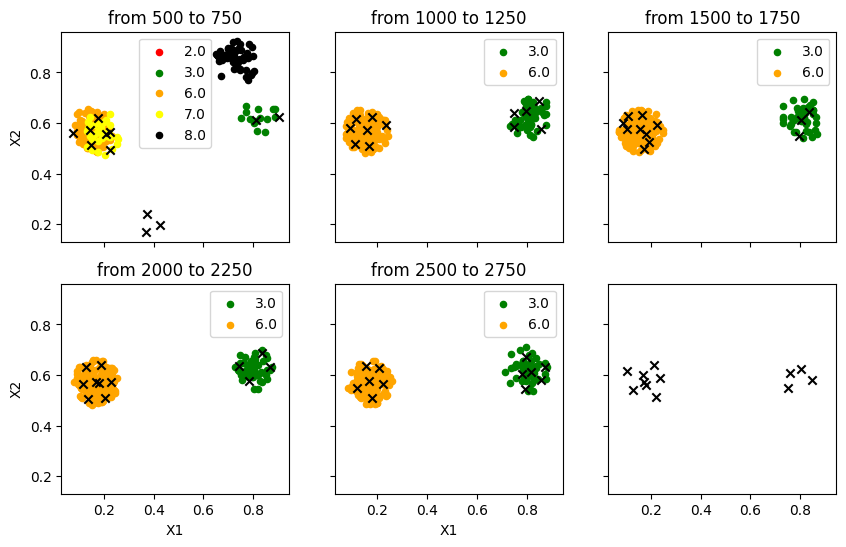

In [4]:
fig ,ax = plt.subplots(2,3,figsize=(10,6),sharex=True, sharey= True)
it = itertools.product((0,1,2),(0,1,2))
colors = {1 : 'blue', 2 : 'red', 3 : 'green', 4 : 'purple' , 5 : 'cyan', 6 : 'orange' , 7 : 'yellow', 8 : 'black' }
i = 0
go = True
dist = []
for x,y in stream.iter_pandas(df,y):
    model = model.learn_one(x)
    i +=1

    if model._initialized :
        if go :
            model.offline_cluster()
            go = False
        print(model.dist_center(x))

    if i % 500 == 0 :

        k,m = next(it)
        centroids = model.get_micro_clusters()
        grouped = ds[i:i+250].groupby('.class')
        for key,group in grouped :
            group.plot(ax=ax[k,m],x='X1',y='X2',kind="scatter",label = key,color=colors[key],title=f'from {i} to {i + 250}')
        ax[k,m].scatter(centroids[:,0],centroids[:,1],marker="x",c='black')
        # ax[k,m].scatter(model.centers[:,0],model.centers[:,1],marker='o',c='white')
    
    if i ==3000 :
        break
    
    
        

   
fig.savefig('window_150_30mc')